Found 337 images belonging to 2 classes.
Found 337 images belonging to 2 classes.
Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 788ms/step - accuracy: 0.6171 - loss: 1.7683 - val_accuracy: 0.6202 - val_loss: 0.5552
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 832ms/step - accuracy: 0.6590 - loss: 0.8464 - val_accuracy: 0.9496 - val_loss: 0.2665
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 784ms/step - accuracy: 0.9373 - loss: 0.2349 - val_accuracy: 0.9852 - val_loss: 0.0740
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 785ms/step - accuracy: 0.9827 - loss: 0.0911 - val_accuracy: 0.9377 - val_loss: 0.1499
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 693ms/step - accuracy: 0.9655 - loss: 0.1630 - val_accuracy: 0.9614 - val_loss: 0.0989
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 774ms/step - accuracy: 0.9221 - loss: 0.1704 - val_accuracy: 0.9674 - val_loss: 0.0661
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 800ms/step - accuracy: 1.0000 - loss: 0.0418 - val_accuracy: 0.9644 - val_loss: 0.0918
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 

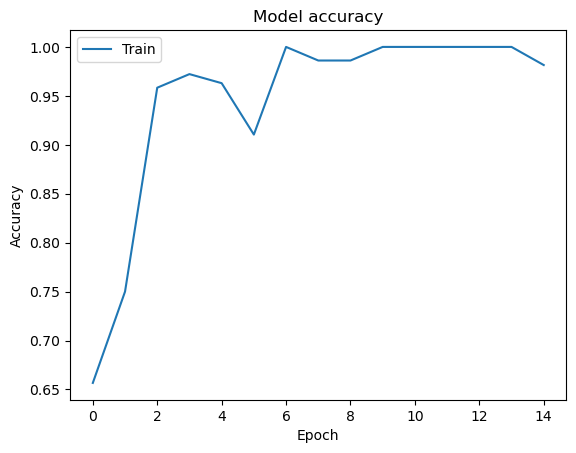

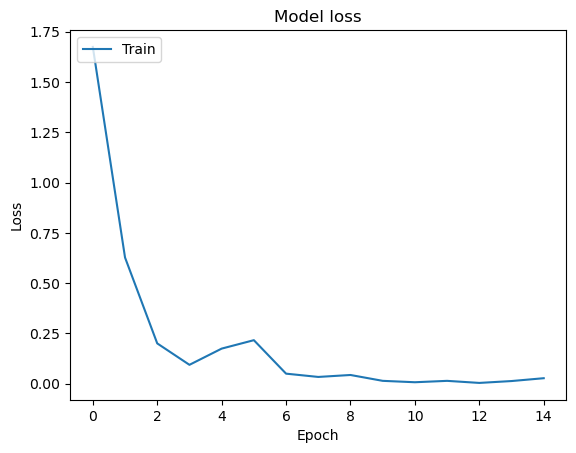

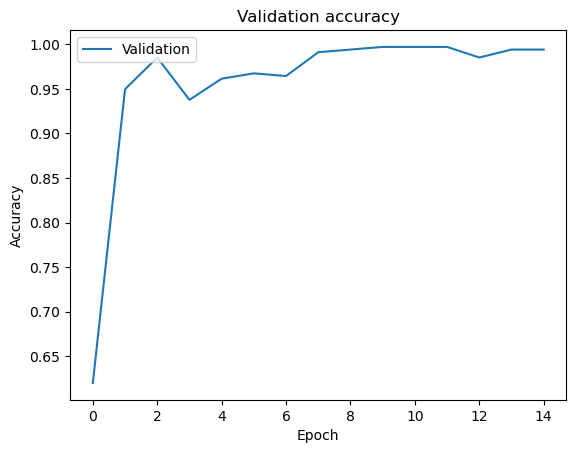

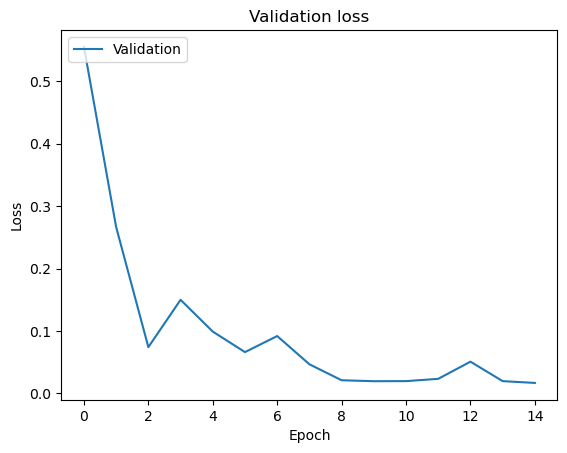

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
The predicted class for the provided image is: Standard


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
from keras.models import load_model

# Define the image size and categories
img_height, img_width = 224, 224
categories = ['Standard', 'Nonstandard']

# Data preparation
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train_dataset = train.flow_from_directory(
    r'C:\Users\jaid\OneDrive\Desktop\DIP_Pro\Train2', 
    target_size=(img_height, img_width), 
    batch_size=9, 
    class_mode='categorical'
)
validation_dataset = validation.flow_from_directory(
    r'C:\Users\jaid\OneDrive\Desktop\DIP_Pro\Validation2', 
    target_size=(img_height, img_width), 
    batch_size=9, 
    class_mode='categorical'
)

# Define the model
num_classes = 2  # Set this to the correct number of classes
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_fit = model.fit(train_dataset, steps_per_epoch=8, epochs=15, validation_data=validation_dataset)

# Save the model
model.save('model.h5')

# Plotting training results
plt.plot(model_fit.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(model_fit.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(model_fit.history['val_accuracy'])
plt.title('Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

plt.plot(model_fit.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Validation'], loc='upper left')
plt.show()

# Function to predict image class
def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    
    predictions = model.predict(img_array)
    predicted_class = categories[np.argmax(predictions)]
    
    return predicted_class

# Example usage
image_path = r'C:\Users\jaid\OneDrive\Desktop\DIP_Pro\Test2\Standard\17.png' # Update with the path to your test image
predicted_class = predict_image_class(image_path)
print(f'The predicted class for the provided image is: {predicted_class}')
